## What is linear regression?
In simple terms, linear regression is a method of finding the best straight line fitting to the given data, 
i.e. finding the best linear relationship between the independent and dependent variables.
In technical terms, linear regression is a machine learning algorithm that finds the best linear-fit 
relationship on any given data, between independent and dependent variables. It is mostly done by the 
Sum of Squared Residuals Method.

In this technique, the dependent variable is continuous, independent variable(s) can be continuous or discrete, 
and nature of regression line is linear.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data=pd.read_csv('student.csv')

In [2]:
data.head(5)

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [11]:
math=data['Math'].values
read=data['Reading'].values
write=data['Writing'].values

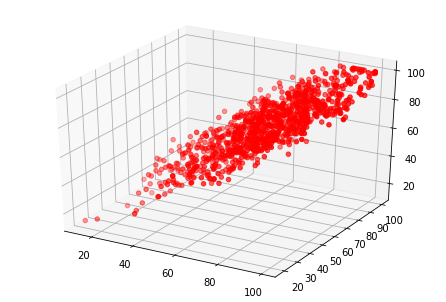

In [12]:
from mpl_toolkits.mplot3d import Axes3D             # plotting 3d scatter plot
fig= plt.figure()
ax= Axes3D(fig)
ax.scatter(math,read,write,color='red')
plt.show()


0.8011595965718689

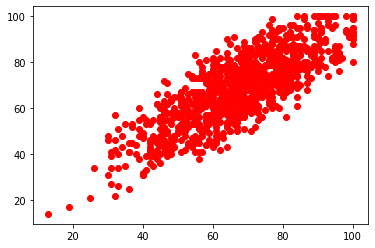

In [18]:
plt.scatter(math,write,color='red')             # to check the correlation
np.corrcoef(math,write)[0][1]

0.9522256981148811

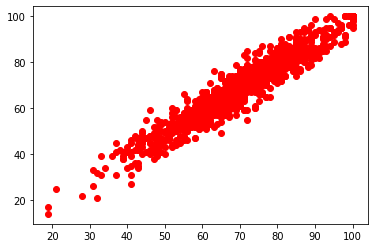

In [17]:
plt.scatter(read,write,color='red')                              # to check the correlation
np.corrcoef(read,write)[0][1]

In [22]:
x=data.iloc[:,:-1].values           #np.array([math,read]).T
y=data.iloc[:,-1].values            # np.array(write)
x

array([[48, 68],
       [62, 81],
       [79, 80],
       ...,
       [89, 87],
       [83, 82],
       [66, 66]], dtype=int64)

In [23]:
#splitting the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#80% training data , 20% test data

print(x_train[:5])

[[95 89]
 [64 70]
 [61 65]
 [86 83]
 [61 60]]


In [24]:
# fitting the regression model
reg= LinearRegression()
reg= reg.fit(x_train,y_train)

In [33]:
print("a1=",reg.coef_[0])
print("a2=",reg.coef_[1])
print("a0=",reg.intercept_)

a1= 0.09356445185841619
a2= 0.9185404534447154
a0= -1.950273295291879


In [32]:
#prediction
y_pred=reg.predict(x_test)
print(y_pred[:5])

[62.82444064 59.52453664 76.99390932 66.6686273  37.52181801]


In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')


### rmse and r-squared value

## What do you mean by adjusted R2? How is it different from R2?

Adjusted R2, just like R2, is a representative of the number of points lying around the regression line. 
That is, it shows how well the model is fitting the training data. The formula for adjusted R2  is —
 
    adj R2 = 1-[(1-r2)(n-1)/ n-k-1]
    
Here, n is the number of data points, and k is the number of features.
One drawback of R2 is that it will always increase with the addition of a new feature, whether the new feature 
is useful or not. The adjusted R2 overcomes this drawback. The value of the adjusted R2 increases only if the 
newly added feature plays a significant role in the model.


In [29]:
from sklearn.metrics import r2_score,mean_squared_error


In [30]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

RMSE= 4.414674861496004


In [31]:
r2= r2_score(y_test,y_pred)
print('regression score=',r2)

regression score= 0.9052409628220129


### residual plot

Text(0.5, 1.0, 'Residual plot')

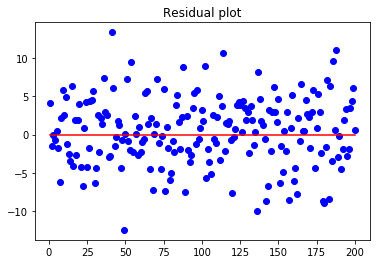

In [34]:
# residual plot

x=[i for i in range(1,len(y_pred)+1)]
x_plot = plt.scatter(x,(y_test-y_pred),c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title('Residual plot')                  #below plot is linear

residuals are randomly distributed against 0(horizontal) there is no pattern/shape(U shape/inverted U shape). 
we can say that the relationship between independent and dependent var are linear. 

if any shape found in residual plot, then it is non linear though high degree of relation exists. then we need to go for other model